In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path

In [16]:
usb_file = Path('l2/recorded_data') / 'lab3_task1c'
df = pl.read_csv(usb_file, separator ='\t')

In [18]:
print(df.columns)
df

['Time (ms)', 'Ch1 V', 'Ch2 V', 'Ch1 A', 'Ch2 A', 'RPM', 'Torque']


Time (ms),Ch1 V,Ch2 V,Ch1 A,Ch2 A,RPM,Torque
f64,f64,f64,f64,f64,f64,f64
0.0,41.754,-0.006,1.106,0.003,1597.924,-0.012
0.063,41.784,0.0,1.114,0.003,1611.327,-0.014
0.125,41.76,0.0,1.147,-0.006,1593.05,-0.014
0.188,41.589,0.0,1.18,0.003,1612.546,-0.014
0.25,41.364,0.0,1.163,0.003,1601.58,-0.015
…,…,…,…,…,…,…
1999.286,0.0,0.0,0.0,-0.006,0.492,-0.009
1999.348,0.0,0.0,0.0,0.011,-0.726,-0.009
1999.411,0.0,0.0,0.0,0.003,1.711,-0.009


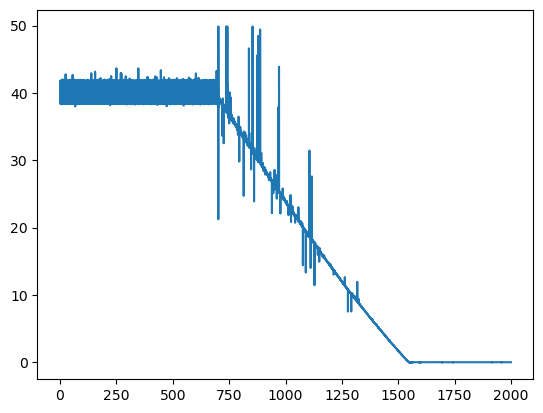

In [19]:
voltage = df['Ch1 V']
time = df['Time (ms)']

plt.plot(time, voltage)

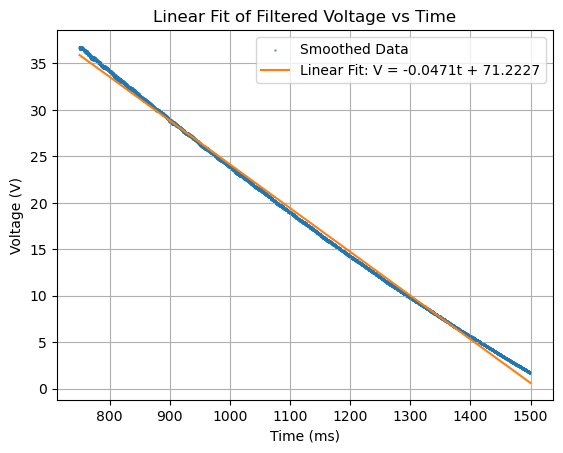

In [36]:
start_index = np.searchsorted(time, 750)
end_index = np.searchsorted(time, 1500)
# Trim data to focus only on the relevant part
filtered_time = time[start_index:end_index]
filtered_voltage = voltage[start_index:end_index]
from scipy.signal import medfilt

smoothed_voltage = medfilt(filtered_voltage, kernel_size=5)
plt.plot(filtered_time, smoothed_voltage)

slope, intercept = np.polyfit(filtered_time, smoothed_voltage, 1)

fitted_voltage = slope*filtered_time + intercept

plt.scatter(filtered_time, smoothed_voltage, label="Smoothed Data", alpha = 0.7, s=0.5)
plt.plot(filtered_time, fitted_voltage, label=f"Linear Fit: V = {slope:.4f}t + {intercept:.4f}")

plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Linear Fit of Filtered Voltage vs Time")
plt.legend()
plt.grid()
plt.show()

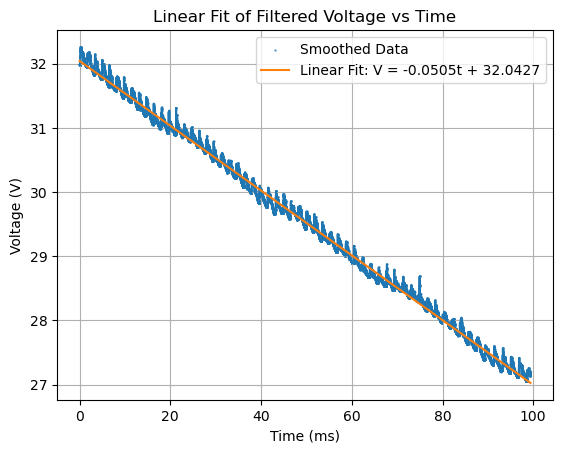

In [48]:
usb_file = Path('l2/recorded_data') / 'task1_gr'
df = pl.read_csv(usb_file, separator ='\t')
voltage = df['Ch1 V']
time = df['Time (ms)']

# Trim data to focus only on the relevant part
filtered_time = time
filtered_voltage = voltage
smoothed_voltage = medfilt(filtered_voltage, kernel_size=5)
plt.plot(filtered_time, smoothed_voltage)

slope, intercept = np.polyfit(filtered_time, smoothed_voltage, 1)

fitted_voltage = slope*filtered_time + intercept

plt.scatter(filtered_time, smoothed_voltage, label="Smoothed Data", alpha = 0.7, s=0.5)
plt.plot(filtered_time, fitted_voltage, label=f"Linear Fit: V = {slope:.4f}t + {intercept:.4f}")

plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Linear Fit of Filtered Voltage vs Time")
plt.legend()
plt.grid()
plt.show()